# Thinking probabilistically-- Continuous variables

In the last chapter, you learned about probability distributions of discrete variables. Now it is time to
move on to continuous variables, such as those that can take on any fractional value. Many of the
principles are the same, but there are some subtleties. At the end of this last chapter of the course,
you will be speaking the probabilistic language you need to launch into the inference techniques
covered in the sequel to this course.


In [1]:
from IPython.display import HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Probability density functions

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Probability_density_functions.mp4" type="video/mp4">
</video>

## Continuous variables
- Quantities that can take any value, not just discrete values

## Probability density function (PDF)
- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable

![][speed_light]

## Normal PDF
![][PDF]

## Normal Cumulative Distribution Function (CDF)
![][CDF]

[speed_light]: _Docs/speed_light.PNG
[PDF]: _Docs/PDF.PNG
[CDF]: _Docs/CDF.PNG

### Interpreting PDFs
Consider the PDF shown to the right (it may take a second to load!). Which of the following is true?

![][PDF]

> Possible Answers
- [x] x is more likely than not less than 10.
- [ ] x is more likely than not greater than 10.
- [ ] We cannot tell from the PDF if x is more likely to be greater than or less than 10.
- [ ] This is not a valid PDF because it has two peaks.

The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.

[PDF]: _Docs/PDF2.PNG

### Interpreting CDFs
At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that **x** is greater than 10?

![][CDF]

Possible Answers
- [x] 0.25
- [ ] 0.75
- [ ] 3.75
- [ ] 15

The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

[CDF]: _Docs/CDF2.PNG

## Introduction to the Normal distribution

In [3]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Introduction_to_the_Normal_distribution.mp4" type="video/mp4">
</video>

## Normal distribution
- Describes a continuous variable whose PDF has a single symmetric peak.

![][normal_dist]

[normal_dist]: _Docs/normal_dist.png

### The Normal PDF
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

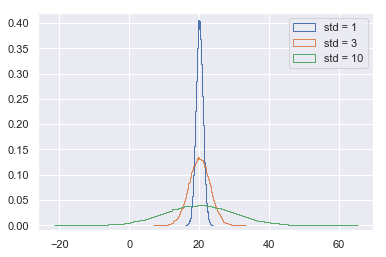

In [4]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

# Make histograms
plt.hist(samples_std1,density=True, bins=100, histtype='step')
plt.hist(samples_std3,density=True, bins=100, histtype='step')
plt.hist(samples_std10,density=True, bins=100, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

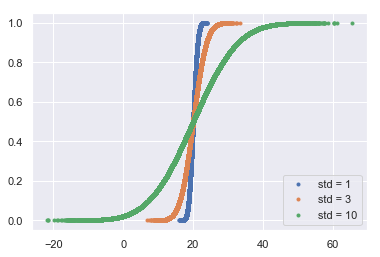

In [6]:
# Generate CDFs
x_std1, y_std1   = ecdf(samples_std1)
x_std3, y_std3   = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

## The Normal distribution: Properties and warnings


In [7]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-The_Normal_distribution_Properties_and_warnings.mp4" type="video/mp4">
</video>

### Gauss and the 10 Deutschmark banknote
What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote, shown to the right?
![][Gauss]

> Possible Answers
- [x] mean = 3, std = 1
- [ ] mean = 3, std = 2
- [ ] mean = 0.4, std = 1
- [ ] mean = 0.6, std = 6


[Gauss]: _Docs/Gauss.png

### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. [Secretariat][1] ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a `CDF`. Overlay the `ECDF` from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the [Belmont Wikipedia page][2].

[1]: https://en.wikipedia.org/wiki/Secretariat_(horse)
[2]: https://en.wikipedia.org/wiki/Belmont_Stakes

In [8]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147. , 147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 , 149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 , 149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 , 150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  , 148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 , 149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 , 149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 , 152.2 ])

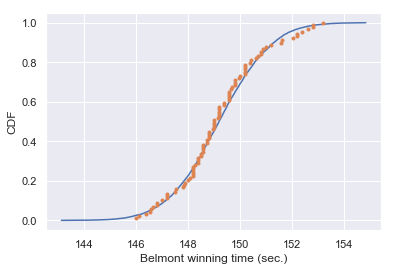

In [9]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [10]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000626


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

## The Exponential distribution


In [11]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/04-The_Exponential_distribution.mp4" type="video/mp4">
</video>

## The Exponential distribution
- The waiting time between arrivals of a Poisson process is Exponentially distributed

## Possible Poisson process
- Nuclear incidents:
    - Timing of one is independent of all others

### Matching a story and a distribution
How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.

> Possible Answers
- [ ] Normal
- [x] Exponential
- [ ] Poisson
- [ ] Uniform

### Waiting for the next Secretariat
Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

> Possible Answers
- [ ] Normal, because the distribution of Belmont winning times are Normally distributed.
- [ ] Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
- [ ] Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
- [x] Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

The Exponential distribution describes the waiting times between rare events, and Secretariat is **rare!**

### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [12]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

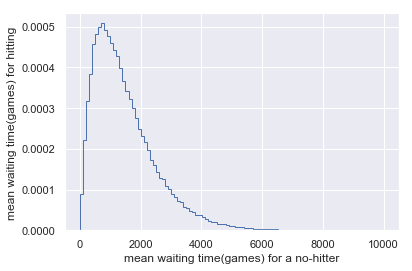

In [13]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715,100000)

# Make the histogram
_ = plt.hist(waiting_times,bins=100, density=True, histtype='step')

# Label axes
_ = plt.xlabel('mean waiting time(games) for a no-hitter')
_ = plt.ylabel('mean waiting time(games) for hitting ')

# Show the plot
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

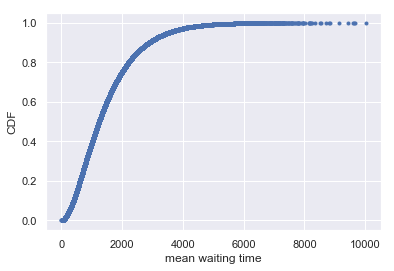

In [14]:
# Get the CDF of the samples and of the data
x, y = ecdf(waiting_times)

# Plot the CDFs and show the plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('mean waiting time')
_ = plt.ylabel('CDF')
plt.show()

## Final thoughts and encouragement toward Statistical Thinking II


In [16]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/05-Final_thoughts.mp4" type="video/mp4">
</video>

## You now can…
- Construct (beautiful) instructive plots
- Compute informative summary statistics
- Use hacker statistics
- Think probabilistically

## In the sequel, you will…
- Estimate parameter values
- Perform linear regressions
- Compute confidence intervals
- Perform hypothesis tests